In [1]:
from yugiquery import *
header('Rush Duel')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Rush Duel - Execution started 17/02/2023 20:42 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

In [3]:
# Fetch rush cards
rush_df = fetch_rush()

1791 results



## Save data

In [4]:
rush_df.to_csv(f'../data/all_rush_{timestamp.isoformat(timespec="minutes")}.csv', index=False)
print('Data saved')

Data saved


# Check changes

## Load previous data

In [6]:
# Get list of files
files_list = sorted(glob.glob('../data/all_rush_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    # previous_df['Misc'] = previous_df['Misc'].dropna().apply(literal_eval)
    # previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(rush_df[previous_df.columns].dtypes.to_dict())
    previous_ts = pd.to_datetime(os.path.basename(files_list[1]).split('_')[-1].rstrip('.csv'))
    print('File loaded')
else:
    previous_df = None
    print('No older files')

No older files


## Generate changelog

In [7]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, rush_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../data/rush_changelog_{timestamp.isoformat(timespec="minutes")}_{previous_ts.isoformat(timespec="minutes")}.csv', index = True)
        print('Changelog saved')

Skipped


# Data visualization

In [8]:
rush_df

,Name,Card type,Property,Archseries,Attribute,Primary type,Monster type,Effect type,Level/Rank,DEF,Legend,Maximum mode,ATK,MAXIMUM ATK,Page name,Page URL,Artwork,Modification date
0,1-Up,Trap Card,Normal Trap Card,NaN,NaN,NaN,NaN,"(Effect,)",NaN,NaN,False,False,NaN,NaN,1-Up,https://yugipedia.com/wiki/1-Up,NaN,2022-09-18 19:47:54
1,1/Infinity,Spell Card,Normal Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,1/Infinity,https://yugipedia.com/wiki/1/Infinity,NaN,2021-12-19 01:15:37
2,1seg Wurm,Monster Card,NaN,"(High Tech Dragon,)",LIGHT,Effect Monster,Dragon,NaN,1,1100,False,False,700,NaN,1seg Wurm,https://yugipedia.com/wiki/1seg_Wurm,NaN,2023-01-22 00:40:17
3,300 Light-Year Red Cloak,Spell Card,Normal Spell Card,"(Cosmic Urban Legend,)",NaN,NaN,NaN,"(Effect,)",NaN,NaN,False,False,NaN,NaN,300 Light-Year Red Cloak,https://yugipedia.com/wiki/300_Light-Year_Red_...,NaN,2022-11-17 12:07:53
4,7 Chance,Trap Card,Normal Trap Card,NaN,NaN,NaN,NaN,"(Effect,)",NaN,NaN,False,False,NaN,NaN,7 Chance,https://yugipedia.com/wiki/7_Chance,NaN,2022-12-10 20:50:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,Zero Drake,Monster Card,NaN,NaN,WATER,Normal Monster,Dragon,NaN,1,1500,False,False,0,NaN,Zero Drake,https://yugipedia.com/wiki/Zero_Drake,NaN,2023-02-05 22:13:12
1787,Zero-Sum Game,Spell Card,Normal Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,Zero-Sum Game,https://yugipedia.com/wiki/Zero-Sum_Game,NaN,2023-02-03 00:56:44
1788,Zombie Carnival,Spell Card,Field Spell Card,NaN,NaN,NaN,NaN,"(Effect,)",NaN,NaN,False,False,NaN,NaN,Zombie Carnival,https://yugipedia.com/wiki/Zombie_Carnival,NaN,2023-01-05 23:00:01
1789,Zombie Fireworks,Spell Card,Normal Spell Card,NaN,NaN,NaN,NaN,"(Effect,)",NaN,NaN,False,False,NaN,NaN,Zombie Fireworks,https://yugipedia.com/wiki/Zombie_Fireworks,NaN,2022-10-20 06:57:57


## Misc

In [9]:
rush_df[rush_df['Legend']]

,Name,Card type,Property,Archseries,Attribute,Primary type,Monster type,Effect type,Level/Rank,DEF,Legend,Maximum mode,ATK,MAXIMUM ATK,Page name,Page URL,Artwork,Modification date
9,Abyss Soldier,Monster Card,NaN,NaN,WATER,Effect Monster,Aqua,"(Effect,)",4,1300,True,False,1800,NaN,Abyss Soldier (Rush Duel),https://yugipedia.com/wiki/Abyss_Soldier_(Rush...,NaN,2022-11-17 12:14:35
26,Alien Shocktrooper,Monster Card,NaN,NaN,EARTH,Normal Monster,Reptile,NaN,4,800,True,False,1900,NaN,Alien Shocktrooper (Rush Duel),https://yugipedia.com/wiki/Alien_Shocktrooper_...,NaN,2022-10-10 09:06:48
70,Archfiend Soldier,Monster Card,NaN,NaN,DARK,Normal Monster,Fiend,NaN,4,1500,True,False,1900,NaN,Archfiend Soldier (Rush Duel),https://yugipedia.com/wiki/Archfiend_Soldier_(...,NaN,2022-12-21 09:03:19
113,Barrel Dragon,Monster Card,NaN,NaN,DARK,Effect Monster,Machine,"(Effect,)",7,2200,True,False,2600,NaN,Barrel Dragon (Rush Duel),https://yugipedia.com/wiki/Barrel_Dragon_(Rush...,"(Edited,)",2023-01-31 21:13:20
146,Behemoth the King of All Animals,Monster Card,NaN,NaN,EARTH,Effect Monster,Beast,"(Effect,)",7,1500,True,False,2700,NaN,Behemoth the King of All Animals (Rush Duel),https://yugipedia.com/wiki/Behemoth_the_King_o...,NaN,2023-02-15 13:22:38
192,Blue-Eyes White Dragon,Monster Card,NaN,NaN,LIGHT,Normal Monster,Dragon,NaN,8,2500,True,False,3000,NaN,Blue-Eyes White Dragon (Rush Duel),https://yugipedia.com/wiki/Blue-Eyes_White_Dra...,"(Alternate,)",2023-01-31 16:37:12
225,Buster Blader,Monster Card,NaN,NaN,EARTH,Effect Monster,Warrior,"(Continuous Effect,)",7,2300,True,False,2600,NaN,Buster Blader (Rush Duel),https://yugipedia.com/wiki/Buster_Blader_(Rush...,NaN,2023-02-17 12:05:34
240,Card Destruction,Spell Card,Normal Spell Card,NaN,NaN,NaN,NaN,"(Effect,)",NaN,NaN,True,False,NaN,NaN,Card Destruction (Rush Duel),https://yugipedia.com/wiki/Card_Destruction_(R...,NaN,2022-09-12 09:32:04
329,The Creator,Monster Card,NaN,NaN,LIGHT,Effect Monster,Thunder,"(Effect,)",8,3000,True,False,2300,NaN,The Creator (Rush Duel),https://yugipedia.com/wiki/The_Creator_(Rush_D...,NaN,2022-09-21 05:55:48
357,Cyber-Tech Alligator,Monster Card,NaN,NaN,WIND,Normal Monster,Machine,NaN,5,1600,True,False,2500,NaN,Cyber-Tech Alligator (Rush Duel),https://yugipedia.com/wiki/Cyber-Tech_Alligato...,NaN,2022-09-21 05:31:31


## Card type

In [10]:
rush_df['Card type'].nunique()

3

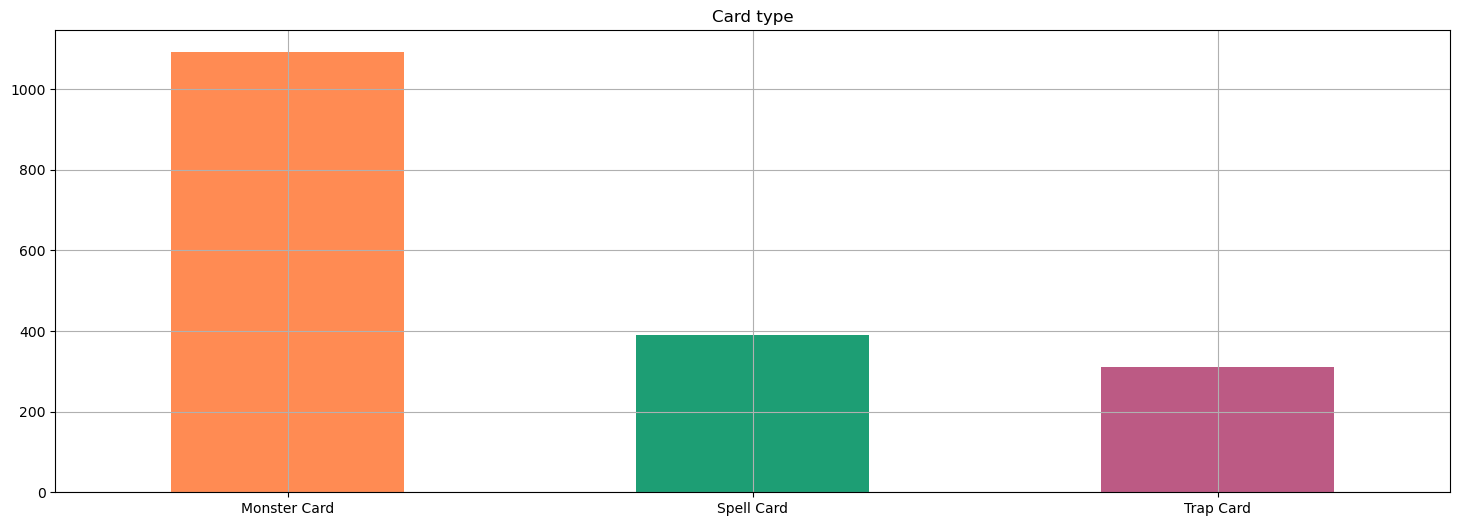

In [11]:
card_type_colors = [colors_dict[i] for i in rush_df['Card type'].value_counts().index]
rush_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Attribute

In [12]:
rush_df['Attribute'].nunique()

7

In [13]:
rush_df['Attribute'].value_counts()

LIGHT    284
EARTH    229
DARK     220
FIRE     130
WATER    115
WIND      98
???        9
Name: Attribute, dtype: int64

## Primary type

In [14]:
rush_df['Primary type'].nunique()

4

In [15]:
rush_df['Primary type'].value_counts()

Effect Monster     605
Normal Monster     368
Fusion Monster      88
Maximum Monster     30
Name: Primary type, dtype: int64

## Monster type

In [16]:
rush_df['Monster type'].nunique()

30

In [17]:
rush_df['Monster type'].value_counts()

Dragon               104
Warrior              100
Machine               99
Galaxy (Type)         71
Spellcaster           68
Fiend                 67
Beast                 57
Pyro                  54
Psychic               53
Aqua                  51
Fairy                 35
Plant                 33
Beast-Warrior         33
Reptile               28
Wyrm                  27
Dinosaur              24
Zombie                23
Thunder               23
Insect                23
Cyberse               22
Winged Beast          21
Sea Serpent           15
Fish                  10
???                    8
Rock                   8
Celestial Warrior      7
High Dragon            7
Cyborg                 5
Omega Psychic          4
Magical Knight         3
Name: Monster type, dtype: int64

## Level/Rank type

In [18]:
rush_df['Level/Rank'].nunique()

16

In [19]:
rush_df['Level/Rank'].value_counts()

4      248
7      179
3      169
1      104
6       92
8       80
2       77
5       65
9       47
10      13
???     10
12       2
15       2
81       1
18       1
99       1
Name: Level/Rank, dtype: int64

## ATK

In [20]:
rush_df['ATK'].nunique()

42

In [21]:
rush_df['ATK'].value_counts()

2500     103
0         87
1500      83
1000      82
1200      71
2400      57
800       45
1300      43
1400      40
1700      38
1600      37
500       35
1100      33
2300      32
100       26
1800      24
2800      21
2200      20
2000      20
900       20
700       20
400       20
200       18
300       17
1900      16
600       15
2100      15
3000      13
2600      12
2900      12
2700       4
3300       2
89000      1
44000      1
3500       1
25000      1
???        1
5000       1
4000       1
96000      1
74000      1
64000      1
Name: ATK, dtype: int64

## DEF

In [22]:
rush_df['DEF'].nunique()

38

In [23]:
rush_df['DEF'].value_counts()

0        224
1000      87
1500      80
500       61
1200      59
2000      58
200       45
1400      39
1600      37
800       37
400       35
600       33
1300      33
100       32
2500      31
1800      26
700       22
900       21
300       20
2100      18
1700      16
1100      14
2400      11
???        9
2200       8
2300       6
1900       6
3000       6
2600       6
2800       3
10         1
96000      1
5000       1
2900       1
51000      1
25000      1
44000      1
80000      1
Name: DEF, dtype: int64

## Effect type

In [24]:
rush_df['Effect type'].explode().nunique()

4

In [25]:
rush_df['Effect type'].explode().value_counts()

Effect                 1026
Continuous Effect        46
Multi-Choice Effect      24
Summoning condition      12
Name: Effect type, dtype: int64

## Archseries

In [26]:
rush_df['Archseries'].explode().nunique()

74

In [27]:
rush_df['Archseries'].explode().value_counts()

Shadow Flower               36
Royal Rebel's               29
Psychic Musician            27
Bubble Actress              26
High Tech Dragon            23
                            ..
Blisstopia                   3
Drone (Rush Duel series)     2
Umi (series)                 2
Fiendish Commander           1
Celestial Warrior            1
Name: Archseries, Length: 74, dtype: int64

## Legend

In [28]:
rush_df['Legend'].sum()

52

## Maximum mode

In [29]:
rush_df['Maximum mode'].sum()

0

In [30]:
rush_df[rush_df['Maximum mode']]

,Name,Card type,Property,Archseries,Attribute,Primary type,Monster type,Effect type,Level/Rank,DEF,Legend,Maximum mode,ATK,MAXIMUM ATK,Page name,Page URL,Artwork,Modification date


In [31]:
### MAXIMUM ATK

In [32]:
rush_df['MAXIMUM ATK'].count()

10

## Artworks

In [33]:
rush_df['Artwork'].nunique()

3

In [34]:
rush_df['Artwork'].value_counts()

(Alternate,)           29
(Edited,)              16
(Alternate, Edited)     4
Name: Artwork, dtype: int64

## Property

In [35]:
rush_df['Property'].nunique()

4

In [36]:
rush_df['Property'].value_counts()

Normal Spell Card    324
Normal Trap Card     310
Field Spell Card      39
Equip Spell Card      26
Name: Property, dtype: int64

# Epilogue

In [37]:
footer(timestamp)

Execution took 0 days 00:01:18.194763


<div align='right'>
    Execution completed 17/02/2023 20:43 UTC
</div>

## HTML export

In [ ]:
# Save notebook on disck before generating HTML report
save_notebook()

In [ ]:
! jupyter nbconvert Rush.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

## Git

In [ ]:
! git add "../*[Rr]ush*"

In [ ]:
! git commit -m {"'Rush duel update-" + timestamp.isoformat() + "'"}